
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Sistemas de Recomendación

## Objetivos del Laboratorio

1.	Implementar y comparar diferentes tipos de sistemas de recomendación utilizando datos reales.

2.	Explorar el impacto de las características de los datos en la calidad de las recomendaciones.

3.	Desarrollar habilidades en preprocesamiento, modelado y evaluación de sistemas de recomendación.


## Los problemas

A lo largo de este laboratorio deberás enfrentarte a distintos casos prácticos:

- **Caso 1: Sistema de Recomendación Basado en Contenido**

	Debes construir un sistema que recomiende videojuegos similares basándose en su descripción y géneros. Para eso deberás:

	- Preprocesar las descripciones de los juegos (texto) utilizando técnicas de NLP aprendidas durante la clase.

	- Extraer y limpiar las etiquetas de género para su uso en el sistema de recomendación.

	- Implementar una métrica de similitud (como el coseno) para recomendar juegos similares.

	- Evaluar las recomendaciones generadas para un conjunto de juegos específicos.

- **Caso 2: Sistema de Recomendación Basado en Popularidad**

	Debes un sistema que recomiende los juegos más populares según su calificación general y número de reseñas. Para eso deberás:
	
	- Limpiar y convertir las columnas relacionadas con las calificaciones y las reseñas en datos numéricos.
	
	- Identificar los juegos más populares utilizando métricas como la mediana de calificaciones ponderadas.
	
	- Crear una tabla de recomendaciones generales para diferentes géneros.

## Los Datos


- **1. games_description.csv**: Este archivo contiene información detallada sobre videojuegos disponibles en una tienda. Las columnas que tenemos son: 


	- **`name`**: Nombre del videojuego.

	- **`short_description`**: Breve descripción del videojuego.

	- **`long_description`**: Descripción completa y detallada del videojuego.

	- **`genres`**: Lista de géneros asociados al videojuego (por ejemplo, Acción, RPG).

	- **`minimum_system_requirement`**: Requisitos mínimos para ejecutar el videojuego.

	- **`recommend_system_requirement`**: Requisitos recomendados para ejecutar el videojuego.

	- **`release_date`**: Fecha de lanzamiento del videojuego.

	- **`developer`**: Nombre del desarrollador del videojuego.

	- **`publisher`**: Nombre del publicador del videojuego.

	- **`overall_player_rating`**: Calificación general de los jugadores (categórica).

	- **`number_of_reviews_from_purchased_people`**: Número de reseñas realizadas por personas que compraron el juego.

	- **`number_of_english_reviews`**: Número de reseñas en inglés.

	- **`link`**: Enlace al videojuego en la tienda.


- **2. games_ranking.csv**: Este archivo contiene información sobre el ranking de videojuegos basados en diferentes métricas. Las columnsa que tenemos son:


	- **`game_name`**: Nombre del videojuego.

	- **`genre`**: Género principal del videojuego.

	- **`rank_type`**: Tipo de ranking (por ejemplo, ventas, popularidad).

	- **`rank`**: Posición del videojuego en el ranking correspondiente.

----

- Los datos del archivo `games_description.csv` pueden utilizarse para construir sistemas de recomendación basados en contenido.
- Los datos del archivo `games_ranking.csv` son ideales para implementar sistemas basados en popularidad.


In [1]:
%load_ext autoreload
%autoreload 2


import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform

import seaborn as sns
import matplotlib.pyplot as plt

from src import soporte_sistemas_recomendacion as sr


# Sistemas de recomendación

### Basado en contenido

In [2]:
df = pd.read_csv('datos/games_description.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   name                                     290 non-null    object
 1   short_description                        277 non-null    object
 2   long_description                         290 non-null    object
 3   genres                                   290 non-null    object
 4   minimum_system_requirement               290 non-null    object
 5   recommend_system_requirement             290 non-null    object
 6   release_date                             290 non-null    object
 7   developer                                290 non-null    object
 8   publisher                                290 non-null    object
 9   overall_player_rating                    290 non-null    object
 10  number_of_reviews_from_purchased_people  290 non-null    objec

In [4]:
df.shape

(290, 13)

In [5]:
df.sample(3)

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
253,Downhill Pro Racer,The first simulator of the real Downhill mount...,About This Game\nREAL DOWNHILL RIDINGDownhill ...,"['Early Access', 'Racing', 'Sports', 'Bikes', ...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"23 Jun, 2023",['Germán de la Fuente'],['Germán de la Fuente'],Positive,(89% of 19) All Time,15,https://store.steampowered.com/app/2266200/Dow...
266,TrackDayR,The most complete motorcycle simulator that al...,About This Game\nImmerse yourself in the most ...,"['Motocross', 'Bikes', 'Racing', 'Simulation',...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"17 Mar, 2021",['MadCow S.r.l.'],['MadCow S.r.l.'],Very Positive,(649),319,https://store.steampowered.com/app/1511630/Tra...
110,Fallout: New Vegas,Welcome to Vegas. New Vegas. Enjoy your stay!,About This Game\n\t\t\t\t\t\t\tWelcome to Vega...,"['Open World', 'RPG', 'Post-apocalyptic', 'Sin...","['OS *: Windows 7/Vista/XP', 'Processor: Dual ...","['OS *: Windows 7/Vista/XP', 'Processor: Dual ...","22 Oct, 2010",['Obsidian Entertainment'],['Bethesda Softworks'],Overwhelmingly Positive,"(173,792)","172,530",https://store.steampowered.com/app/22380/Fallo...


In [6]:
df.head()

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...


In [7]:
df['long_description'][0]

'About This Game\n\t\t\t\t\t\t\tBlack Myth: Wukong is an action RPG rooted in Chinese mythology. The story is based on Journey to the West, one of the Four Great Classical Novels of Chinese literature. You shall set out as the Destined One to venture into the challenges and marvels ahead, to uncover the obscured truth beneath the veil of a glorious legend from the past.• Explore a Land of Vast Wonders"A world unseen, where wonders gleam,And with each stride, a new scene streams."Enter a fascinating realm filled with the wonders and discoveries of ancient Chinese mythology!As the Destined One, you shall traverse an array of breathtaking and distinctive landscapes from the classic tale, composing an epic of adventure that is seen anew.• Confront Mighty Foes, Old and New"Heroic Monkey, might and fame, Adversaries rise, to test his name."One of the major highlights of Journey to the West is its diverse cast of adversaries, each with their unique strengths.As the Destined One, you will enco

In [8]:
df['genres'][0]

"['Mythology', 'Action RPG', 'Action', 'RPG', 'Souls-like', 'Combat', 'Story Rich', 'Singleplayer', 'Drama', 'Action-Adventure', 'Dark Fantasy', 'Atmospheric', 'Adventure', '3D', 'Fantasy', 'Hack and Slash', 'Third Person', 'Difficult', 'Music', 'Violent']"

In [9]:
# import ast

# df['genres'] = df['genres'].map(ast.literal_eval)

In [10]:
df["long_description"] = df["long_description"].str.replace("About This Game\n", "") # me quito ese espacio
df["long_description"] = df["long_description"].str.replace("\t", "") #quito todas las barras,t que le siguen al inicio
df["long_description"][0]


'Black Myth: Wukong is an action RPG rooted in Chinese mythology. The story is based on Journey to the West, one of the Four Great Classical Novels of Chinese literature. You shall set out as the Destined One to venture into the challenges and marvels ahead, to uncover the obscured truth beneath the veil of a glorious legend from the past.• Explore a Land of Vast Wonders"A world unseen, where wonders gleam,And with each stride, a new scene streams."Enter a fascinating realm filled with the wonders and discoveries of ancient Chinese mythology!As the Destined One, you shall traverse an array of breathtaking and distinctive landscapes from the classic tale, composing an epic of adventure that is seen anew.• Confront Mighty Foes, Old and New"Heroic Monkey, might and fame, Adversaries rise, to test his name."One of the major highlights of Journey to the West is its diverse cast of adversaries, each with their unique strengths.As the Destined One, you will encounter powerful foes and worthy 

In [11]:
df['columnas_similitudes'] = df['genres'] + ' ' + df['long_description']

In [12]:
df['columnas_similitudes'][0]

'[\'Mythology\', \'Action RPG\', \'Action\', \'RPG\', \'Souls-like\', \'Combat\', \'Story Rich\', \'Singleplayer\', \'Drama\', \'Action-Adventure\', \'Dark Fantasy\', \'Atmospheric\', \'Adventure\', \'3D\', \'Fantasy\', \'Hack and Slash\', \'Third Person\', \'Difficult\', \'Music\', \'Violent\'] Black Myth: Wukong is an action RPG rooted in Chinese mythology. The story is based on Journey to the West, one of the Four Great Classical Novels of Chinese literature. You shall set out as the Destined One to venture into the challenges and marvels ahead, to uncover the obscured truth beneath the veil of a glorious legend from the past.• Explore a Land of Vast Wonders"A world unseen, where wonders gleam,And with each stride, a new scene streams."Enter a fascinating realm filled with the wonders and discoveries of ancient Chinese mythology!As the Destined One, you shall traverse an array of breathtaking and distinctive landscapes from the classic tale, composing an epic of adventure that is se

In [13]:
vectorize = CountVectorizer(max_features=250, stop_words='english')
vectorize

CountVectorizer(max_features=250, stop_words='english')

Trabajo mis columnas a utilizar

In [14]:
x = vectorize.fit_transform(df['columnas_similitudes']).toarray() #tomo para mi modelo a mi columna genres
x

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 2]], dtype=int64)

In [15]:
similarity = cosine_similarity(x)
similarity

array([[1.        , 0.19296125, 0.39886202, ..., 0.20470987, 0.22237479,
        0.21328085],
       [0.19296125, 1.        , 0.30785965, ..., 0.09931698, 0.11442591,
        0.14965432],
       [0.39886202, 0.30785965, 1.        , ..., 0.09331542, 0.15768331,
        0.20622941],
       ...,
       [0.20470987, 0.09931698, 0.09331542, ..., 1.        , 0.26706425,
        0.27942845],
       [0.22237479, 0.11442591, 0.15768331, ..., 0.26706425, 1.        ,
        0.20121091],
       [0.21328085, 0.14965432, 0.20622941, ..., 0.27942845, 0.20121091,
        1.        ]])

In [16]:
def get_index_from_name(name):
    return df[df.name == name].index[0]

def get_name_from_index(index):
    return df[df.index == index]['name'].values[0]

In [17]:
user_like_game = 'God of War' #hago la prueba con este juego

In [18]:
game_index = get_index_from_name(user_like_game) #busco el indice de mi pelicula
game_index

118

In [19]:
similarity[game_index] #busco la similitud de mi juego elegido con los demás

array([0.54750873, 0.19808994, 0.4185625 , 0.38190761, 0.34144194,
       0.12352535, 0.15754358, 0.18551563, 0.13679645, 0.21863961,
       0.38331947, 0.40587717, 0.08698393, 0.31215329, 0.33469667,
       0.32219004, 0.35408725, 0.23521877, 0.34069407, 0.160834  ,
       0.2086686 , 0.46377782, 0.29095024, 0.1622868 , 0.30116971,
       0.31254542, 0.27900842, 0.30251076, 0.44108617, 0.58032904,
       0.14784425, 0.31938009, 0.22863729, 0.40512796, 0.28217954,
       0.52162579, 0.45884787, 0.19941447, 0.13883629, 0.29624711,
       0.20805993, 0.42361715, 0.39750357, 0.42084704, 0.27546002,
       0.34285136, 0.41927535, 0.37277823, 0.23082177, 0.07598252,
       0.31779021, 0.42955971, 0.25285258, 0.37908157, 0.39949921,
       0.54985814, 0.25542158, 0.30076455, 0.35294826, 0.33800012,
       0.51277625, 0.25252955, 0.33182105, 0.43491966, 0.60002939,
       0.33337964, 0.38174771, 0.20272506, 0.28186015, 0.25221119,
       0.45578996, 0.44358526, 0.18793053, 0.54966123, 0.47771

In [20]:
similar_games=list(enumerate(similarity[game_index]))

In [21]:
similar_games[:20]

[(0, 0.5475087286633239),
 (1, 0.1980899374012126),
 (2, 0.41856250266500405),
 (3, 0.38190761099583714),
 (4, 0.34144193903230274),
 (5, 0.12352534954341744),
 (6, 0.15754357667209357),
 (7, 0.18551562534109625),
 (8, 0.136796452473072),
 (9, 0.21863960914830732),
 (10, 0.3833194738921656),
 (11, 0.4058771728014314),
 (12, 0.0869839312029283),
 (13, 0.31215328897044675),
 (14, 0.33469666553985455),
 (15, 0.3221900411813265),
 (16, 0.3540872517447565),
 (17, 0.23521876807019254),
 (18, 0.3406940741163924),
 (19, 0.1608339984204301)]

In [22]:
sorted_games =sorted(similar_games, key=lambda x: x[1], reverse=True) #Lo ordenamos para que nos de las pelis que más se parecen a nuestra peli
top_game ={}
for i in sorted_games[1:21]: # le digo que me devuelva las primera 20 pelis sin contar ella misma
    top_game[get_name_from_index(i[0])]=i[1]
top_game

{'Monster Hunter: World': 0.6000293899143787,
 'Visions of Mana': 0.598889517148715,
 'The Witcher 3: Wild Hunt': 0.5803290378203678,
 'Hogwarts Legacy': 0.5709400984658658,
 'Sonic Frontiers': 0.5607987647363062,
 'Fallout: New Vegas': 0.5533921861034679,
 'Hollow Knight': 0.5498581405151927,
 "Dragon's Dogma 2": 0.5496612262305692,
 'Black Myth: Wukong': 0.5475087286633239,
 'Little Nightmares II': 0.5444256583078056,
 'FINAL FANTASY VII REMAKE INTERGRADE': 0.5236150669261558,
 'ELDEN RING Shadow of the Erdtree': 0.5216257868108022,
 'DARK SOULS™ III': 0.5157415815079571,
 'Borderlands 2': 0.5127762458389932,
 'Fallout 4': 0.5025966187423616,
 'STAR WARS Jedi: Survivor™': 0.48740496022461083,
 'Europa Universalis IV': 0.4835497749865286,
 'Forza Horizon 5': 0.4807738586797924,
 'Lies of P': 0.4777174662568534,
 'Total War: MEDIEVAL II – Definitive Edition': 0.4764167626747925}

C:\Users\DELL\AppData\Local\Temp\ipykernel_4880\2950592361.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


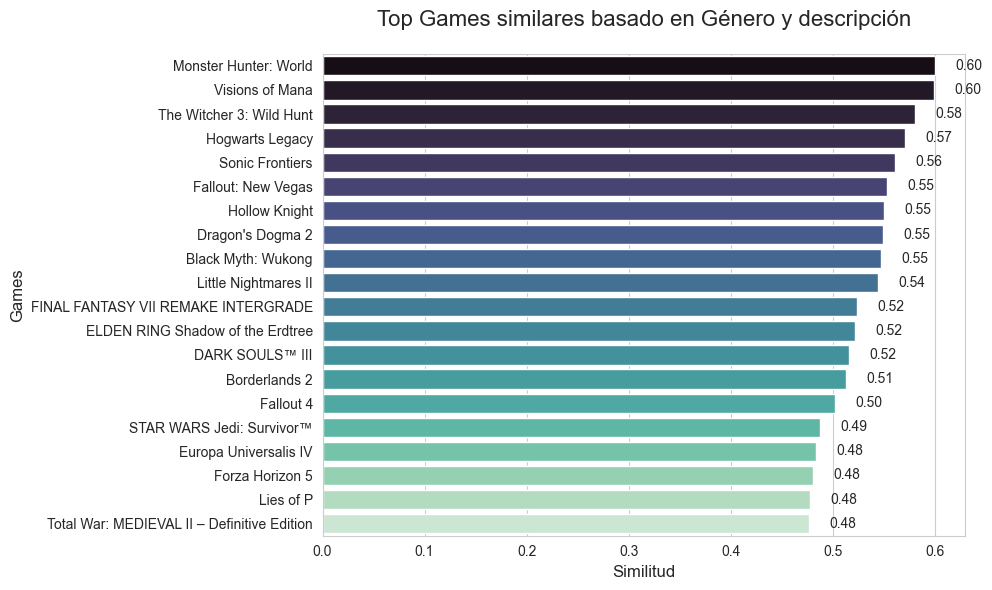

In [23]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.barplot(
    x=list(top_game.values()), 
    y=list(top_game.keys()), 
    palette="mako"
)

plt.title("Top Games similares basado en Género y descripción", fontsize=16, pad=20)
plt.xlabel("Similitud", fontsize=12)
plt.ylabel("Games", fontsize=12)

# Añadir valores al final de cada barra
for i, value in enumerate(top_game.values()):
    plt.text(value + 0.02, i, f"{value:.2f}", va='center', fontsize=10)

plt.tight_layout()


Tenemos 2 juegos que tienen la mayor similitud, o son más fáciles de recomendar en base a gustos: Monster Hunter World y Visions of Mana. Por lo demás, los siguientes tienen similitudes entre un 58 y 48%.

### Basado en popularidad

In [24]:
df_rank = pd.read_csv('datos/games_ranking.csv')

In [25]:
df_rank.shape

(672, 4)

In [26]:
df_rank['rank_type'].value_counts()

rank_type
Revenue    240
Sales      220
Review     212
Name: count, dtype: int64

In [27]:
df_rank[(df_rank['rank_type'] == 'Review') & (df_rank['genre'] == 'Action')]

,game_name,genre,rank_type,rank
76,Counter-Strike 2,Action,Review,1
77,Grand Theft Auto V,Action,Review,2
78,Dota 2,Action,Review,3
79,Terraria,Action,Review,4
80,Black Myth: Wukong,Action,Review,5
81,Wallpaper Engine,Action,Review,6
82,Tom Clancy's Rainbow Six® Siege,Action,Review,7
83,Left 4 Dead 2,Action,Review,8
84,The Witcher 3: Wild Hunt,Action,Review,9
85,Team Fortress 2,Action,Review,10


In [28]:
df_rank[df_rank['game_name'] == 'Counter-Strike 2']

,game_name,genre,rank_type,rank
0,Counter-Strike 2,Action,Sales,1
38,Counter-Strike 2,Action,Revenue,3
76,Counter-Strike 2,Action,Review,1


In [29]:
df_rank.shape

(672, 4)

In [30]:
df_rank.T

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
game_name,Counter-Strike 2,"Warhammer 40,000: Space Marine 2",Cyberpunk 2077,Black Myth: Wukong,ELDEN RING,PUBG: BATTLEGROUNDS,DRAGON BALL: Sparking! ZERO,Apex Legends™,Dota 2,Party Animals,...,Golf Gang,Lonely Mountains: Downhill,GP Bikes,Golf Peaks,PIPE by BMX Streets,MXGP PRO,MXGP 2019 - The Official Motocross Videogame,Ride 2,Tanuki Sunset,Grand Mountain Adventure: Wonderlands
genre,Action,Action,Action,Action,Action,Action,Action,Action,Action,Action,...,Sports & Racing,Sports & Racing,Sports & Racing,Sports & Racing,Sports & Racing,Sports & Racing,Sports & Racing,Sports & Racing,Sports & Racing,Sports & Racing
rank_type,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales,...,Review,Review,Review,Review,Review,Review,Review,Review,Review,Review
rank,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40


In [31]:
df_final = df_rank.merge(df, left_on='game_name', right_on='name', how='inner')
df_final.head()

,game_name,genre,rank_type,rank,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link,columnas_similitudes
0,Counter-Strike 2,Action,Sales,1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive..."
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,Embody the superhuman skill and brutality of a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...,"['Warhammer 40K', 'Action', 'Third-Person Shoo..."
2,Cyberpunk 2077,Action,Sales,3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...","Cyberpunk 2077 is an open-world, action-advent...","['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '..."
3,Black Myth: Wukong,Action,Sales,4,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,Black Myth: Wukong is an action RPG rooted in ...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...,"['Mythology', 'Action RPG', 'Action', 'RPG', '..."
4,ELDEN RING,Action,Sales,5,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,THE CRITICALLY ACCLAIMED FANTASY ACTION RPGRis...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...,"['Souls-like', 'Dark Fantasy', 'Open World', '..."


In [32]:
df_final.duplicated().sum()

0

In [33]:
df_final.shape

(656, 18)

In [34]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   game_name                                656 non-null    object
 1   genre                                    656 non-null    object
 2   rank_type                                656 non-null    object
 3   rank                                     656 non-null    int64 
 4   name                                     656 non-null    object
 5   short_description                        634 non-null    object
 6   long_description                         656 non-null    object
 7   genres                                   656 non-null    object
 8   minimum_system_requirement               656 non-null    object
 9   recommend_system_requirement             656 non-null    object
 10  release_date                             656 non-null    objec

In [35]:
df_final['overall_player_rating'].value_counts()

overall_player_rating
Very Positive              344
Overwhelmingly Positive    171
Mixed                       70
Mostly Positive             60
Mostly Negative              4
Very Negative                2
7 user reviews               1
Positive                     1
6 user reviews               1
1 user reviews               1
4 user reviews               1
Name: count, dtype: int64

In [36]:
steam_ratings = {
    "Overwhelmingly Positive": 10,
    "Very Positive": 9,
    "Positive": 8,
    "Mostly Positive": 7,
    "Mixed": 6,
    "Mostly Negative": 5,
    "Negative": 4,
    "Very Negative": 3,
    "Extremely Negative": 2,
    "Overwhelmingly Negative": 1
}

In [37]:
df_final['overall_player_rating'] = df_final['overall_player_rating'].map(steam_ratings).fillna(6).astype(int)

In [38]:
df_final['overall_player_rating'].value_counts()

overall_player_rating
9     344
10    171
6      74
7      60
5       4
3       2
8       1
Name: count, dtype: int64

In [39]:
df_final['number_of_reviews_from_purchased_people'].nunique()

287

In [40]:
df_final['genre'].value_counts()

genre
Simulation         119
Strategy           115
Sports & Racing    115
Action             112
Role-Playing       103
Adventure           92
Name: count, dtype: int64

In [41]:
df_final_filtro = df_final[['name', 'genre', 'overall_player_rating', 'number_of_english_reviews']]

In [42]:
df_final_filtro.head()

,name,genre,overall_player_rating,number_of_english_reviews
0,Counter-Strike 2,Action,9,"2,258,990"
1,"Warhammer 40,000: Space Marine 2",Action,9,"51,920"
2,Cyberpunk 2077,Action,9,"324,124"
3,Black Myth: Wukong,Action,10,"51,931"
4,ELDEN RING,Action,9,"491,741"


In [43]:
df_final_filtro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   name                       656 non-null    object
 1   genre                      656 non-null    object
 2   overall_player_rating      656 non-null    int32 
 3   number_of_english_reviews  656 non-null    object
dtypes: int32(1), object(3)
memory usage: 18.1+ KB


In [44]:
df_final_filtro['number_of_english_reviews'] = df_final_filtro['number_of_english_reviews'].str.replace(',','')
df_final_filtro['number_of_english_reviews'] = df_final_filtro['number_of_english_reviews'].astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4880\3474297930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filtro['number_of_english_reviews'] = df_final_filtro['number_of_english_reviews'].str.replace(',','')
C:\Users\DELL\AppData\Local\Temp\ipykernel_4880\3474297930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filtro['number_of_english_reviews'] = df_final_filtro['number_of_english_reviews'].astype(int)


In [45]:
df_recomendador = df_final_filtro.groupby(['name', 'genre'])[['overall_player_rating', 'number_of_english_reviews']].median().reset_index()

In [46]:
df_recomendador.shape

(392, 4)

In [47]:
df_recomendador.head()

,name,genre,overall_player_rating,number_of_english_reviews
0,69 Balls,Sports & Racing,9.0,120.0
1,7 Days to Die,Simulation,9.0,158982.0
2,ARK: Survival Ascended,Adventure,6.0,36814.0
3,ARK: Survival Evolved,Action,9.0,310038.0
4,Age of Empires II (Retired),Strategy,10.0,43872.0


In [50]:
df_recomendador['genre'].unique()

array(['Sports & Racing', 'Simulation', 'Adventure', 'Action', 'Strategy',
       'Role-Playing'], dtype=object)

La función que he creado funciona al introducir el data frame listo, una de los géneros utilizados (mostrados arriba) y dos palabras claves: reviews o rating

In [49]:
sr.top_games_by_genre(df_recomendador, 'Action', orden='rating')

,name,genre,overall_player_rating,number_of_english_reviews
175,Left 4 Dead 2,Action,10.0,273964.0
104,Dying Light,Action,10.0,115682.0
255,Resident Evil 4,Action,10.0,57896.0
89,Devil May Cry 5,Action,10.0,39742.0
277,Sekiro™: Shadows Die Twice - GOTY Edition,Action,10.0,84656.0
